In [5]:
import matplotlib.pyplot as plt
import tensorflow.keras as tfk
import numpy as np
import pandas as pd
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model
import itertools
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from keras.preprocessing import image
from keras  import preprocessing
from keras.models import load_model

In [6]:
img_height = 256
img_width = 256
channels = 3
batch_size = 16
epochs = 20

# Image Processing

In [8]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.8)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_set = train_datagen.flow_from_directory(
    './test',
    target_size = (img_height, img_width),
    
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training',
    shuffle=True)
val_set = train_datagen.flow_from_directory(
    './test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical', 
    subset='validation',
    shuffle=True)
test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  )
test_generator = test_datagen.flow_from_directory( './test',
                                                    target_size = (img_height, img_width),
                                                    batch_size=5,
                                                    class_mode='categorical', shuffle=False)

Found 8 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


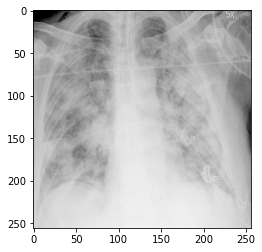

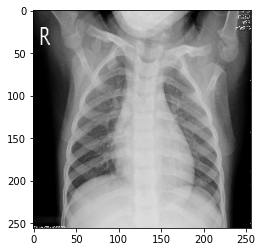

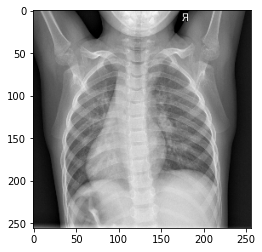

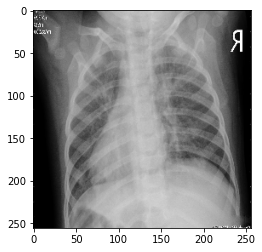

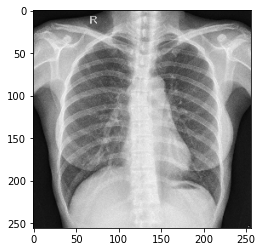

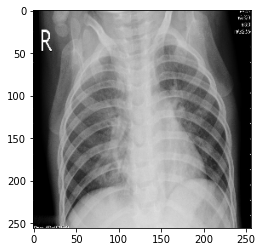

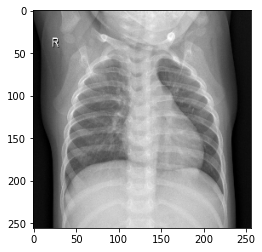

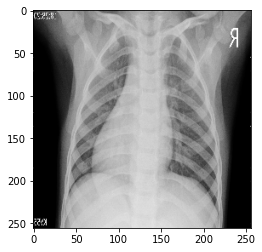

In [9]:
x,y = val_set.next()
for i in range(8):
    image = x[i]
    plt.imshow(image)
    plt.show()

# Implementasi Model

In [27]:
model = VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, channels))

for layer in model.layers:
    layer.trainable = False

headModel = model.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
headModel = Dense(num_class, activation="softmax")(headModel)
model = Model(inputs=model.input, outputs=headModel)
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

# Pelatihan

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 12 steps, validate for 50 steps
Epoch 1/10
12/12 [==============================] - 209s 17s/step - loss: 1.1059 - accuracy: 0.5707 - val_loss: 0.9855 - val_accuracy: 0.8537
Epoch 2/10
12/12 [==============================] - 213s 18s/step - loss: 1.0182 - accuracy: 0.5924 - val_loss: 0.9173 - val_accuracy: 0.8363
Epoch 3/10
12/12 [==============================] - 220s 18s/step - loss: 0.9324 - accuracy: 0.6848 - val_loss: 0.8509 - val_accuracy: 0.8763
Epoch 4/10
12/12 [==============================] - 217s 18s/step - loss: 0.8383 - accuracy: 0.6902 - val_loss: 0.7752 - val_accuracy: 0.8813
Epoch 5/10
12/12 [==============================] - 210s 17s/step - loss: 0.8015 - accuracy: 0.7120 - val_loss: 0.7072 - val_accuracy: 0.8725
Epoch 6/10
12/12 [==============================] - 207s 17s/step - loss: 0.7724 - accuracy: 0.7337 - val_loss: 0.6676 - val_accuracy: 0.8900
Epoch 7/10
12/12 [==============================] - 208s

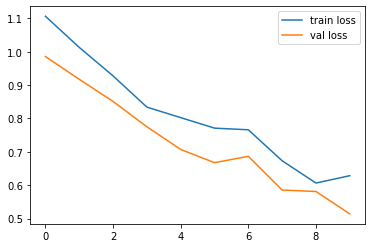

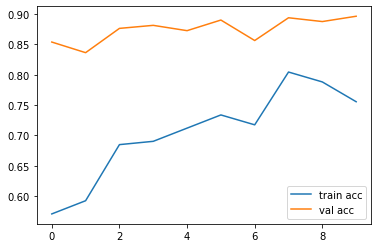

  ...
    to  
  ['...']
Akurasi 0.91
Loss 0.3750518672168255


<Figure size 432x288 with 0 Axes>

In [31]:
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
%matplotlib inline
import math 
import datetime
import time
start = datetime.datetime.now()
history_tl = model.fit_generator(train_set,
                                 steps_per_epoch=train_set.n // 16,
                                 epochs=10,
                                 validation_data=val_set,
                                 validation_steps=val_set.n // 16)
end= datetime.datetime.now()
elapsed= end-start
print ('Waktu: ', elapsed)
plt.plot(history_tl.history['loss'], label='train loss')
plt.plot(history_tl.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('loss_vgg195')
# plot the accuracy
plt.plot(history_tl.history['accuracy'], label='train acc')
plt.plot(history_tl.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('acc_vgg195')
model.save('RESNETepoch10-80%.h5')
test_score = model.evaluate_generator(train_set, batch_size)
print('Akurasi',test_score[1]) 
print('Loss',test_score[0])

# Confusion Matrix 

In [10]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
Confusion matrix, without normalization
Classification Report
              precision    recall  f1-score   support

    COVID-19       1.00      0.50      0.67        10
      NORMAL       0.71      0.50      0.59        10
   PNEUMONIA       0.40      0.80      0.53        10
         TBC       0.38      0.30      0.33        10

    accuracy                           0.53        40
   macro avg       0.62      0.53      0.53        40
weighted avg       0.62      0.53      0.53        40



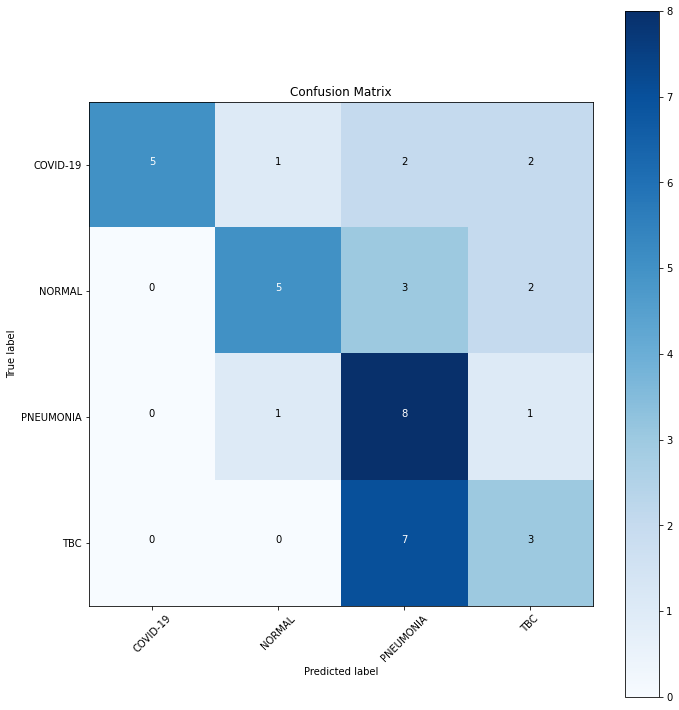

In [14]:
model = tf.keras.models.load_model('INCEPTION-50%-25.h5')

num_class = test_generator.num_classes
labels = test_generator.class_indices.keys()

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, labels, title='Confusion Matrix')

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=labels))

In [10]:
from keras.models import load_model
from keras.preprocessing import image
from keras  import preprocessing
model = tf.keras.models.load_model('VGG19-80%-100.h5')

result  = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
print('Loss:', result[0])
print('Accuracy:', result[1])

  ...
    to  
  ['...']
8/8 [==============================] - 769s 96s/step - loss: 0.3302 - accuracy: 0.9500
Loss: 0.3301714440531214
Accuracy: 0.95


# Testing Data Belum Berlabel

['COVID-19', 'NORMAL', 'PNEUMONIA', 'TBC']
Kategori : TBC
Akurasi  : 100.0 %


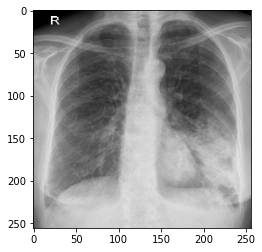

In [9]:
labels = ['COVID-19', 'NORMAL', 'PNEUMONIA', 'TBC']
print(labels)

model = tf.keras.models.load_model('VGG19-80%-100.h5')
image_path='x.png'
img = image.load_img(image_path, target_size=(256, 256))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
y = model.predict(img_data)
print('Kategori :',labels[np.argmax(y)])
print('Akurasi  :', 100*np.max(y),'%')